# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [38]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

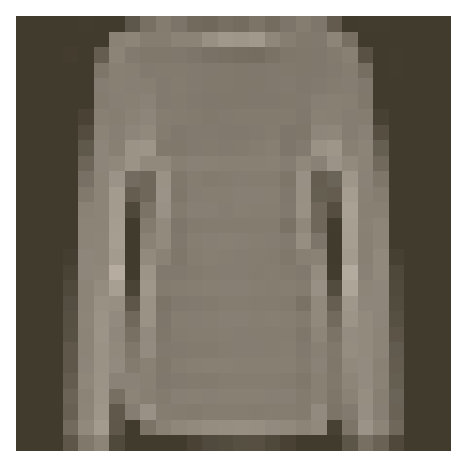

In [39]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [41]:
# TODO: Define your network architecture here

class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,400)
        self.fc2 = nn.Linear(400,200)
        self.fc3 = nn.Linear(200,100)
        self.fc4 = nn.Linear(100,10)
    
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        
        return x

model = Network()
image.resize_(32,1,784)
model.forward(image[0,:])

tensor([[-0.1031,  0.0509, -0.0821,  0.0129, -0.1407,  0.0736,  0.0973, -0.1000,
          0.0726, -0.0414]], grad_fn=<AddmmBackward>)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [42]:
# TODO: Create the network, define the criterion and optimizer
model=Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [57]:
# TODO: Train the network here
epochs = 5
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images,labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0],784)
        optimizer.zero_grad()
        
        
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/5...  Loss: 0.3032
Epoch: 1/5...  Loss: 0.3101
Epoch: 1/5...  Loss: 0.3126
Epoch: 1/5...  Loss: 0.3005
Epoch: 1/5...  Loss: 0.3156
Epoch: 1/5...  Loss: 0.3041
Epoch: 1/5...  Loss: 0.2834
Epoch: 1/5...  Loss: 0.3206
Epoch: 1/5...  Loss: 0.2917
Epoch: 1/5...  Loss: 0.3278
Epoch: 1/5...  Loss: 0.3191
Epoch: 1/5...  Loss: 0.3408
Epoch: 1/5...  Loss: 0.3062
Epoch: 1/5...  Loss: 0.3259
Epoch: 1/5...  Loss: 0.3127
Epoch: 1/5...  Loss: 0.2835
Epoch: 1/5...  Loss: 0.2892
Epoch: 1/5...  Loss: 0.3002
Epoch: 1/5...  Loss: 0.3289
Epoch: 1/5...  Loss: 0.2785
Epoch: 1/5...  Loss: 0.3089
Epoch: 1/5...  Loss: 0.2942
Epoch: 1/5...  Loss: 0.3261
Epoch: 2/5...  Loss: 0.1737
Epoch: 2/5...  Loss: 0.3090
Epoch: 2/5...  Loss: 0.2883
Epoch: 2/5...  Loss: 0.2997
Epoch: 2/5...  Loss: 0.3107
Epoch: 2/5...  Loss: 0.3157
Epoch: 2/5...  Loss: 0.2939
Epoch: 2/5...  Loss: 0.3137
Epoch: 2/5...  Loss: 0.3033
Epoch: 2/5...  Loss: 0.3109
Epoch: 2/5...  Loss: 0.2914
Epoch: 2/5...  Loss: 0.2892
Epoch: 2/5...  Loss:

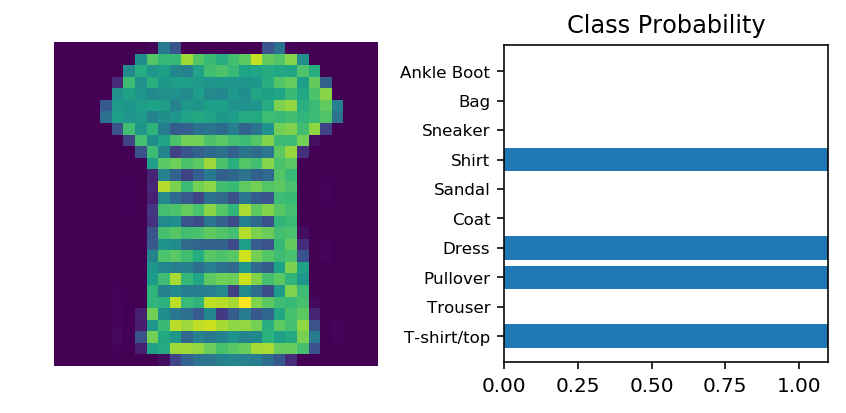

In [56]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    ps = model.forward(img)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.